In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading Data from the CSV File**

In [25]:
data = pd.read_csv("C:\\Users\\Gastly\\Desktop\\Marketing_Data.csv")

****Converting Data to a Pandas Dataframe****

In [26]:
data = pd.DataFrame(data)


In [27]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


**Step 0 : Normalizing The Dataset**

In [28]:

X = (data - data.mean())/(data.max()- data.min())
X_train = X.iloc[:, :-1]
X_train = X_train.T
y  = X.iloc[:,-1]
y = np.array([y])
#print(X)
#print(X_train)
#print(y_train)
#X_train.shape[0]

**Step 1 : Initializing Parameters**

In [29]:
def initialize_parameters(lenw):
    theta = np.random.randn(1,lenw)
    theta_not = 0
    return theta,theta_not

**Step 2 : Hypothesis Function**

In [30]:
def hypothesis_function(X,theta,theta_not):
    h = np.dot(theta,X) + theta_not
    return h

**Step 3 : Calculating Cost function**

In [31]:
def cost_function(h,y):
    m = y.shape[1]
    J = (1/2*m)*np.sum(np.square(h-y))
    return J

**Step 4 : Gradient Descent (i)**

In [32]:
def back_prop(X,y,h):
    m = y.shape[1]
    dh = (1/m)*(h-y)
    d_theta= np.dot(dh,X.T)
    d_theta_not = np.sum(dh)
    return d_theta,d_theta_not
    

**Step 4 : Gradient Descent (ii)**

In [33]:
def gradient_descent(theta,theta_not,d_theta,d_theta_not,learning_rate):
    theta = theta-learning_rate*d_theta
    theta_not = theta_not- learning_rate*d_theta_not
    return theta,theta_not

**Step 5 : Bringing it all togehter**

In [34]:
def MLR(x_train,y,learning_rate,epochs):
    lenw = x_train.shape[0]
    theta,theta_not = initialize_parameters(lenw)  #step 1
    costs_train = []
    
    for i in range(1,epochs+1):
        h = hypothesis_function(x_train,theta,theta_not) #step 2
        cost_train = cost_function(h,y) #step 3
        d_theta,d_theta_not = back_prop(X_train,y,h) #step 4
        theta,theta_not = gradient_descent(theta,theta_not,d_theta,d_theta_not,learning_rate)   #step 5
        if i%10==0:
            costs_train.append(cost_train)
        
        print('Epochs' +str(i)+'/'+str(epochs)+' : ')
        print('Training Cost '+ str(cost_train))
    
    plt.plot(costs_train)
    plt.xlabel('Iteration (per tens)')
    plt.ylabel('Training cost')
    plt.title('Learning cost ' +str(learning_rate))
    plt.show()

Epochs1/1000 : 
Training Cost 7435.258833384056
Epochs2/1000 : 
Training Cost 7186.925317898538
Epochs3/1000 : 
Training Cost 6947.2656945058725
Epochs4/1000 : 
Training Cost 6715.969523258287
Epochs5/1000 : 
Training Cost 6492.737681949253
Epochs6/1000 : 
Training Cost 6277.281947178197
Epochs7/1000 : 
Training Cost 6069.324591125366
Epochs8/1000 : 
Training Cost 5868.59799344109
Epochs9/1000 : 
Training Cost 5674.844267676484
Epochs10/1000 : 
Training Cost 5487.81490170456
Epochs11/1000 : 
Training Cost 5307.270411601803
Epochs12/1000 : 
Training Cost 5132.98000848056
Epochs13/1000 : 
Training Cost 4964.721277782022
Epochs14/1000 : 
Training Cost 4802.279870558375
Epochs15/1000 : 
Training Cost 4645.449206290689
Epochs16/1000 : 
Training Cost 4494.030186806431
Epochs17/1000 : 
Training Cost 4347.830920877114
Epochs18/1000 : 
Training Cost 4206.666459092694
Epochs19/1000 : 
Training Cost 4070.3585386246073
Epochs20/1000 : 
Training Cost 3938.735337504233
Epochs21/1000 : 
Training Cost

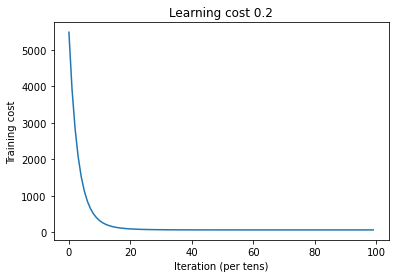

In [36]:
MLR(X_train,y,0.2,1000)